##importing the libraries


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


##Data Preprocessing


In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
  
)

Found 70295 files belonging to 38 classes.


##validation image processing

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in  training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[ 97.  96. 101.]
   [ 91.  90.  95.]
   [ 88.  87.  92.]
   ...
   [ 95.  93.  98.]
   [ 96.  94.  99.]
   [ 92.  90.  95.]]

  [[101. 100. 105.]
   [ 98.  97. 102.]
   [ 97.  96. 101.]
   ...
   [ 98.  96. 101.]
   [ 97.  95. 100.]
   [ 92.  90.  95.]]

  [[ 96.  95. 100.]
   [ 97.  96. 101.]
   [ 99.  98. 103.]
   ...
   [102. 100. 105.]
   [100.  98. 103.]
   [ 96.  94.  99.]]

  ...

  [[199. 192. 186.]
   [198. 191. 185.]
   [197. 190. 184.]
   ...
   [144. 148. 157.]
   [143. 147. 156.]
   [142. 146. 155.]]

  [[199. 192. 186.]
   [199. 192. 186.]
   [197. 190. 184.]
   ...
   [145. 149. 158.]
   [142. 146. 155.]
   [139. 143. 152.]]

  [[196. 189. 183.]
   [196. 189. 183.]
   [195. 188. 182.]
   ...
   [145. 149. 158.]
   [142. 146. 155.]
   [138. 142. 151.]]]


 [[[154. 153. 167.]
   [165. 164. 178.]
   [171. 170. 184.]
   ...
   [111. 108. 127.]
   [107. 104. 123.]
   [120. 117. 136.]]

  [[171. 170. 184.]
   [172. 171. 185.]
   [170. 169. 183.]
   ...
   [148. 1

##convolution of the neural network :
convolution
pooling(max,avg)
fully connected


Bulding the model

In [60]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [61]:
model=Sequential(
    # Dense(1024,activation='relu'),
    # Dense(38,activation='softmax')
)

Bulding the convolution layer

In [62]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [63]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [64]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [65]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [66]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [67]:
model.add(Dropout(0.25))#to avoid the overfitting

To Avoid the overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may  possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [68]:
model.add(Flatten())
##flatten is used for the process of converting multi-dimen into one dimensional 
model.add(Dense(units=1500,activation='relu'))

In [69]:
model.add(Dropout(0.4))

In [70]:
##output Layer
model.add(Dense(units=38,activation='softmax'))
##what is happening here is unit are the total no. of the file
##in your train folder dense check it all and the activation will return the 
##probability of all the clases and if any class have more probability that congrats we get the answer

In [73]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.summary()
##it gives the summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                 

##Model Training

In [75]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 918s 412ms/step - loss: 0.9726 - accuracy: 0.7129 - val_loss: 0.3319 - val_accuracy: 0.8936
Epoch 2/10
2197/2197 [==============================] - 738s 336ms/step - loss: 0.2938 - accuracy: 0.9053 - val_loss: 0.2256 - val_accuracy: 0.9292
Epoch 3/10
2197/2197 [==============================] - 738s 336ms/step - loss: 0.1717 - accuracy: 0.9443 - val_loss: 0.1741 - val_accuracy: 0.9438
Epoch 4/10
2197/2197 [==============================] - 736s 335ms/step - loss: 0.1184 - accuracy: 0.9612 - val_loss: 0.1334 - val_accuracy: 0.9557
Epoch 5/10
2197/2197 [==============================] - 734s 334ms/step - loss: 0.0834 - accuracy: 0.9722 - val_loss: 0.1262 - val_accuracy: 0.9592
Epoch 6/10
2197/2197 [==============================] - 733s 334ms/step - loss: 0.0737 - accuracy: 0.9760 - val_loss: 0.0997 - val_accuracy: 0.9694
Epoch 7/10
2197/2197 [==============================] - 731s 333ms/step - loss: 0.0604 - accuracy: 0.9809 - val_

##Model evaluation

In [76]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 262s 119ms/step - loss: 0.0260 - accuracy: 0.9925


In [77]:
print(train_loss,train_acc)

0.025955284014344215 0.9925457239151001


###Model validation Set ch kay ahe loss and accuracy

In [79]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 62s 111ms/step - loss: 0.1200 - accuracy: 0.9682


In [80]:
print(val_loss,val_acc)

0.11996158957481384 0.9682449102401733


##saving madel
save kyu karte hai kyuki har waqt hame model na krna pade bahut bhadi process hoti hai woh isliye

In [81]:
model.save("train_model.h5")

save krne ke type hai
like .h5 or .keras
if we use h5 storage jyada leta hai elsewhere .keras use karte hai toh space bhi kaam lagati hai

In [82]:
model.save("train_model.keras")

model krte samay kya kya change aya hai hame pate chalana chaiye isiliye .history use kerte hai

In [83]:
training_history.history


{'loss': [0.9726295471191406,
  0.2937717139720917,
  0.17172181606292725,
  0.11837752163410187,
  0.08341184258460999,
  0.07370415329933167,
  0.060386016964912415,
  0.05067878216505051,
  0.043540552258491516,
  0.038440145552158356],
 'accuracy': [0.7128814458847046,
  0.9052706360816956,
  0.9442634582519531,
  0.961206316947937,
  0.9721886515617371,
  0.975986897945404,
  0.9809374809265137,
  0.984209418296814,
  0.9862294793128967,
  0.9874528646469116],
 'val_loss': [0.3318597078323364,
  0.2256343960762024,
  0.17407956719398499,
  0.13342450559139252,
  0.12615378201007843,
  0.09969472140073776,
  0.13075318932533264,
  0.11357349157333374,
  0.08789686858654022,
  0.11996161937713623],
 'val_accuracy': [0.8936375975608826,
  0.9292055368423462,
  0.9438310861587524,
  0.9556680917739868,
  0.9591964483261108,
  0.9694400429725647,
  0.9632369875907898,
  0.965627133846283,
  0.9731959700584412,
  0.9682449102401733]}

##recording the history of model training in json


In [85]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

##ACCURACY VISUALIZATION

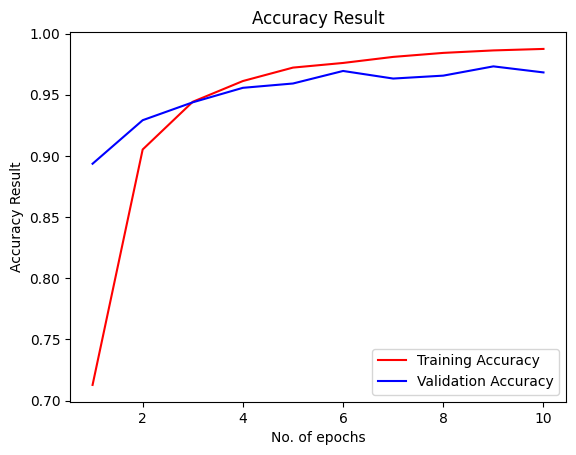

In [94]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Accuracy Result")
plt.legend()
plt.show()

### Some Other Metric for model evaluation

In [97]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

we use validation set for a testing


In [98]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
  
)

Found 17572 files belonging to 38 classes.


predicting the model 

In [100]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 51s 93ms/step


(array([[9.9999964e-01, 2.9695874e-10, 3.4476638e-12, ..., 1.5245325e-15,
         6.4392686e-15, 8.9186271e-12],
        [9.9999845e-01, 2.2140591e-10, 1.0515746e-13, ..., 1.3436059e-19,
         2.3301415e-18, 4.3140193e-16],
        [1.0000000e+00, 3.5810903e-11, 7.5169248e-14, ..., 3.5127876e-20,
         2.5268520e-17, 4.7442298e-14],
        ...,
        [1.5835695e-17, 3.9439219e-18, 9.4413418e-15, ..., 2.7391926e-16,
         9.2398746e-18, 1.0000000e+00],
        [1.5612027e-17, 4.1758894e-18, 2.6989881e-17, ..., 1.1001595e-15,
         8.9728668e-17, 1.0000000e+00],
        [1.8427081e-23, 7.3739223e-26, 9.5526579e-25, ..., 1.3199468e-23,
         3.2772524e-20, 1.0000000e+00]], dtype=float32),
 (17572, 38))

what does this code statement gives us
y_pred gives that prediction of that img is belonging to the class 1 of valid set ,and having the max probability.

our  aim it to find the max probability amoung all the probability such that finalize the answer

In [102]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [103]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

getting ot extracting the maximum elelemet from each row

In [105]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.87      1.00      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.89      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

###claculating the confusion matrix


In [117]:
cn = confusion_matrix(y_true,predicted_categories)
cn,cn.shape

(array([[485,   0,   0, ...,   0,   0,   1],
        [  0, 492,   0, ...,   0,   0,   0],
        [  0,   0, 434, ...,   0,   0,   1],
        ...,
        [  0,   0,   0, ..., 488,   0,   0],
        [  0,   0,   0, ...,   0, 445,   0],
        [  0,   0,   0, ...,   0,   0, 481]], dtype=int64),
 (38, 38))

###Visulaization of confsusion matrix

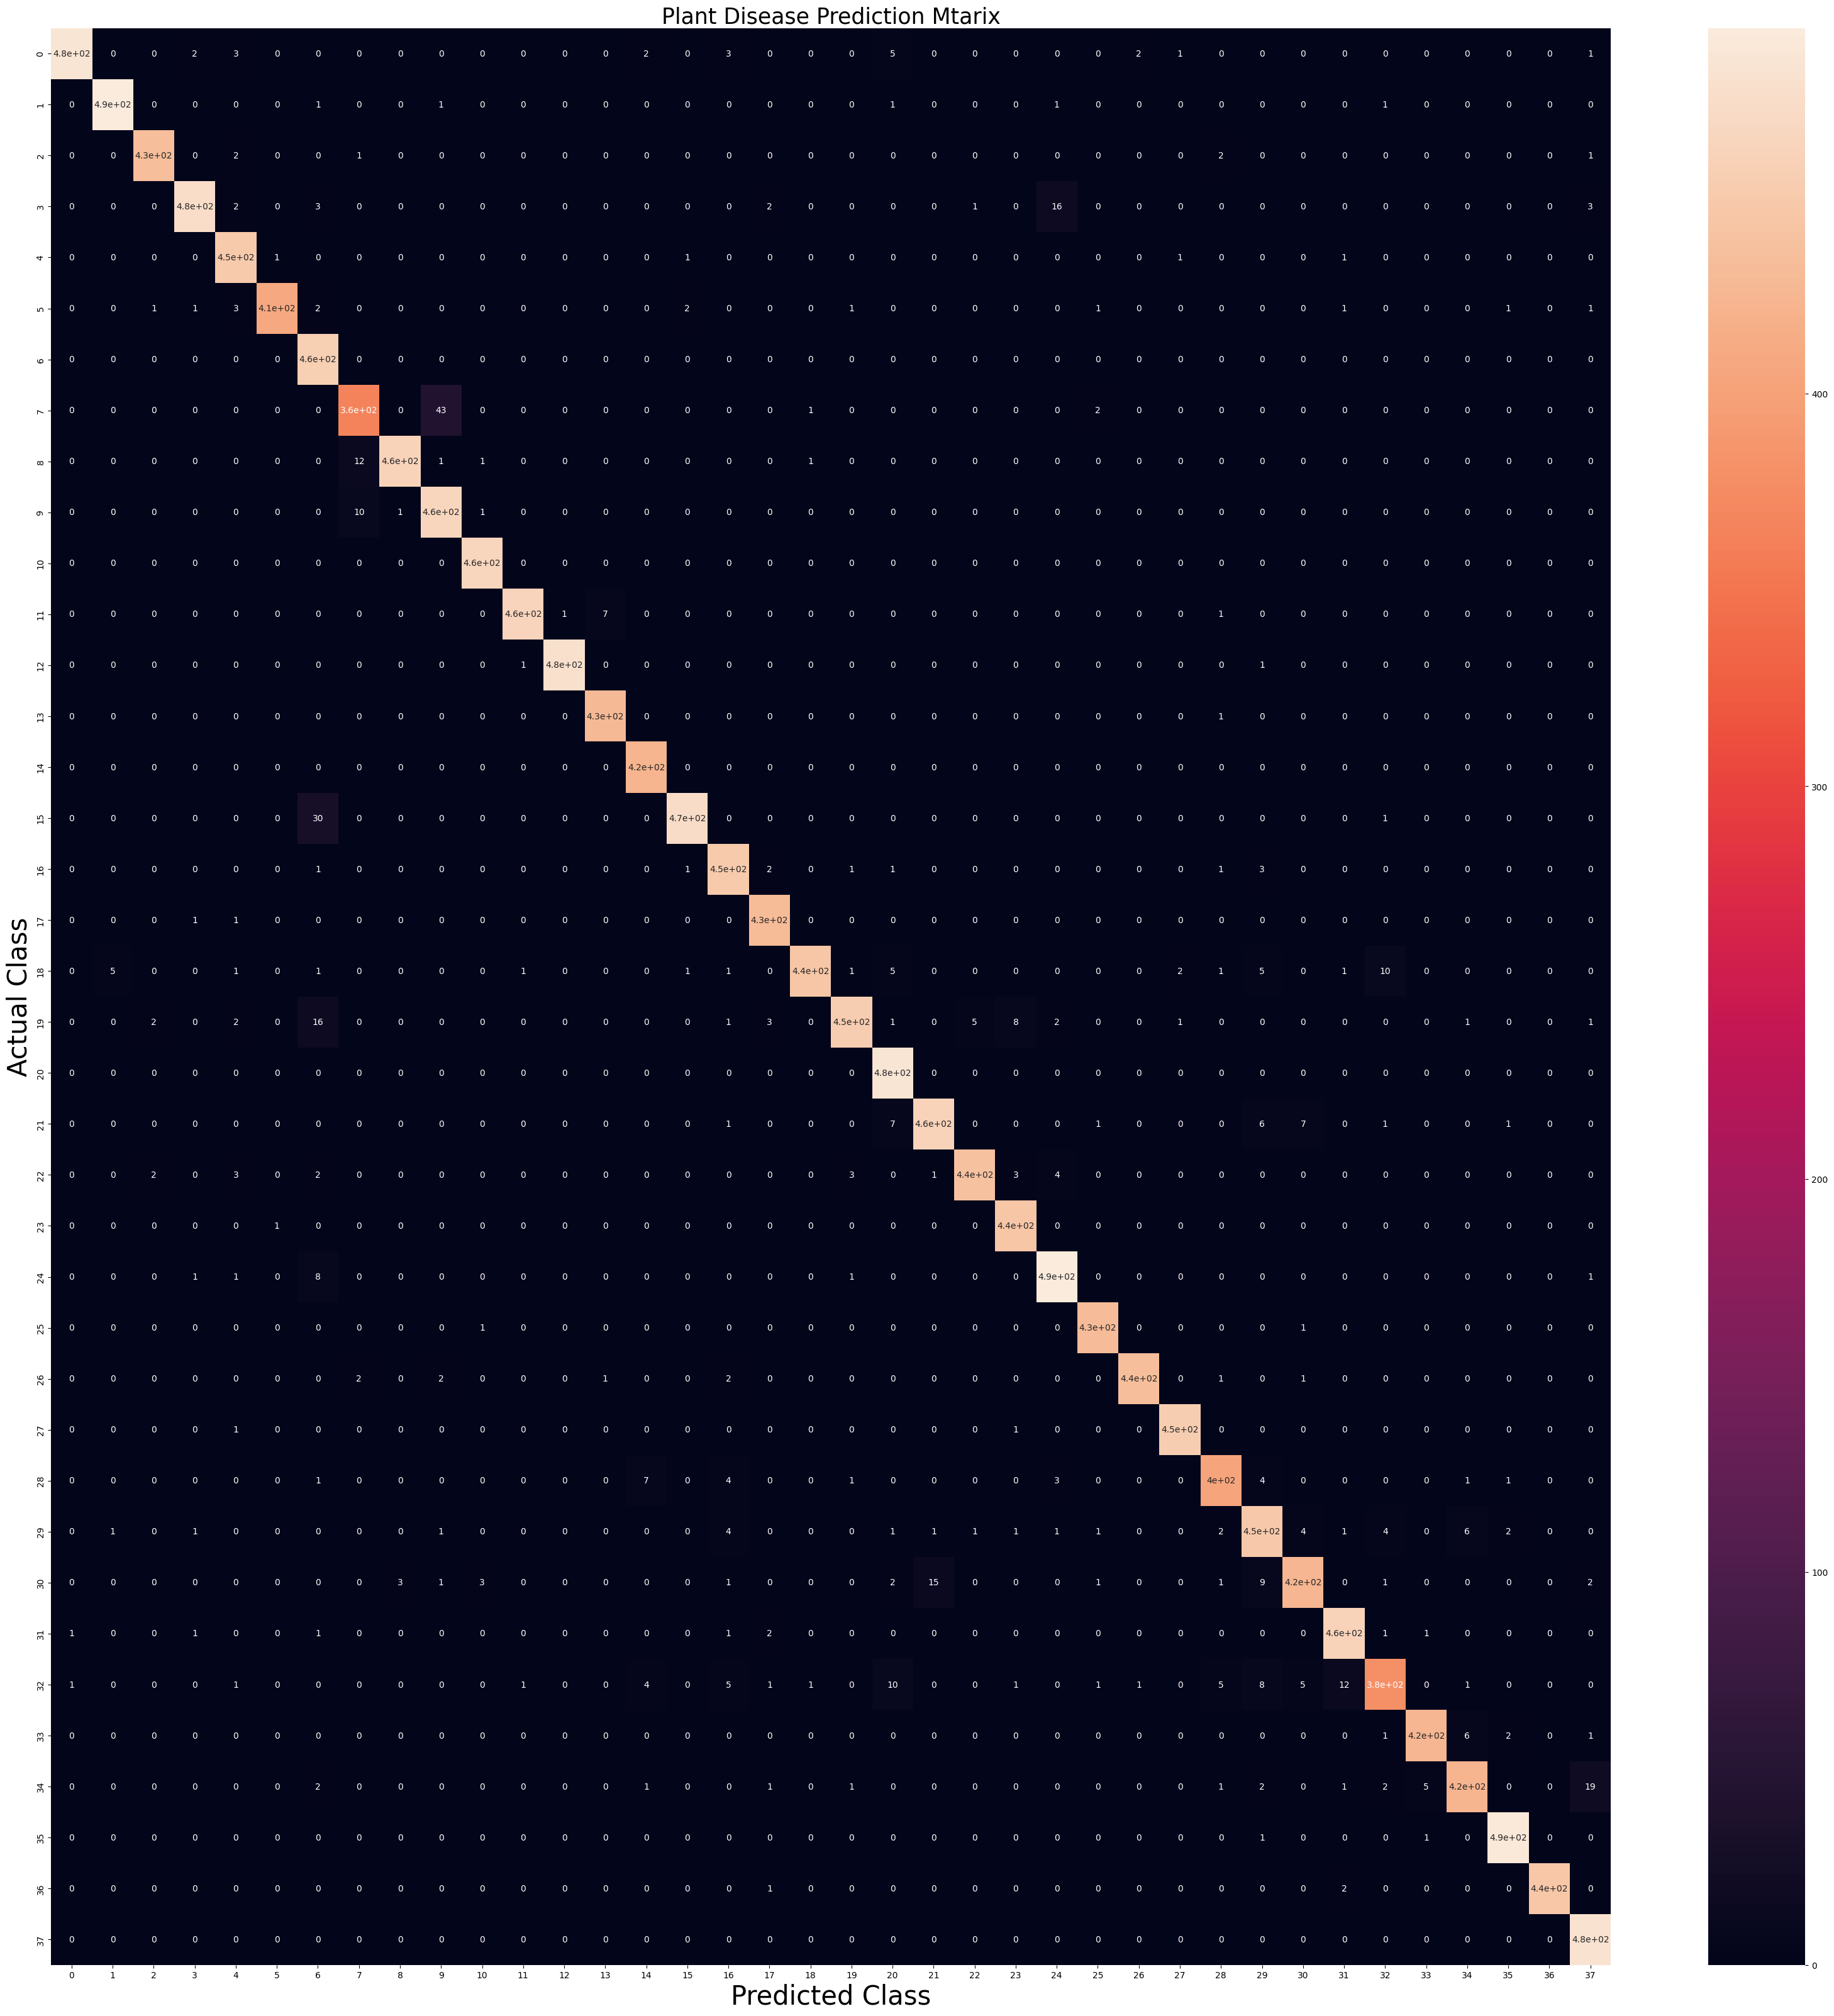

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})##increase the size of the digits
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Plant Disease Prediction Mtarix",fontsize=25)
plt.show()